In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [27]:
df= pd.read_csv('batting_bowling_ipl_bat.csv')

In [28]:
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


Able to see every alternate rows with a null value. So removing the rows 

In [29]:
df.shape

(180, 7)

In [30]:
df.dropna(inplace=True)

In [31]:
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0


In [32]:
df.shape

(90, 7)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


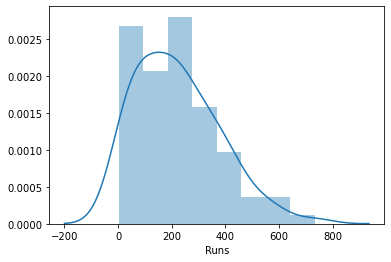

In [35]:
sns.distplot(df['Runs'])

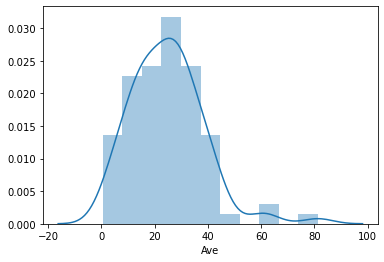

In [36]:
sns.distplot(df['Ave'])

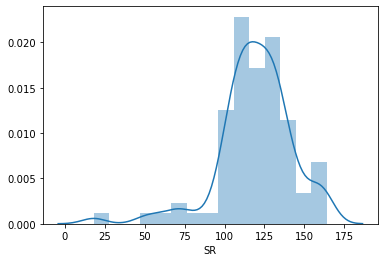

In [37]:
sns.distplot(df['SR'])

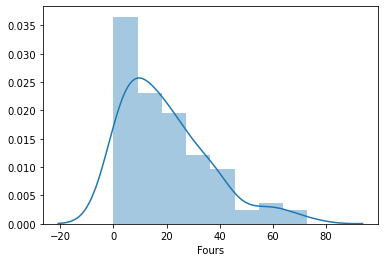

In [38]:
sns.distplot(df['Fours'])

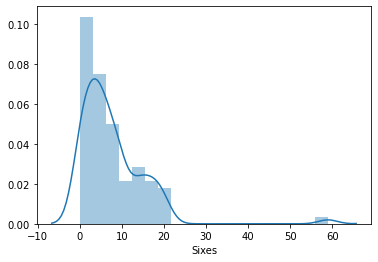

In [39]:
sns.distplot(df['Sixes'])

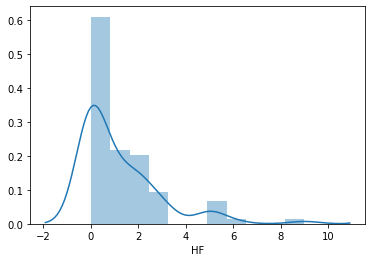

In [40]:
sns.distplot(df['HF'])

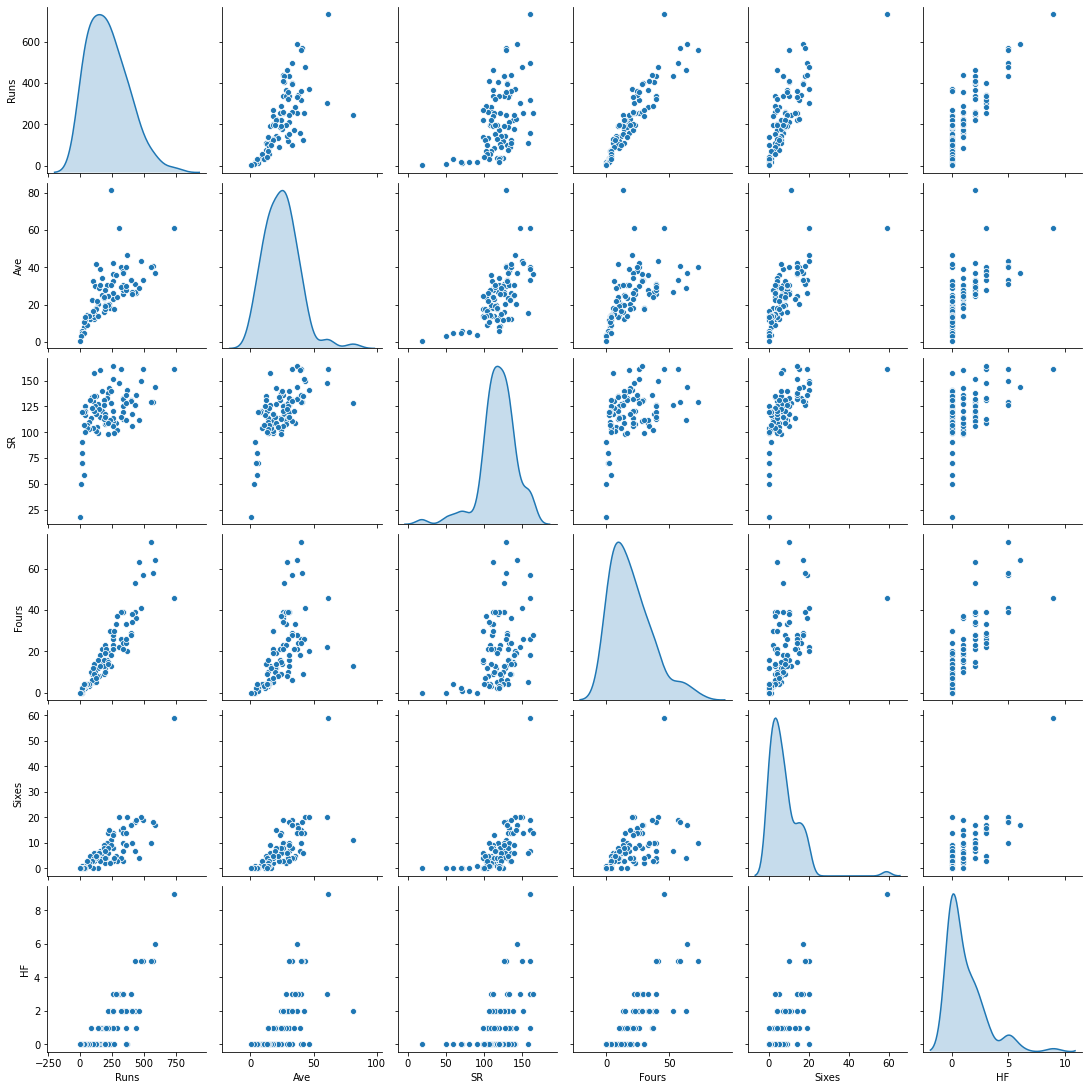

In [41]:
sns.pairplot(df, diag_kind='kde')

In [42]:
df.corr()

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


Upon reviewing other variables relationships with Average run, it can be concluded that Runs, SR, Four, Sixes and HF also have a moderate positive relationship with Average run.

In [43]:
X=df.drop('Name', axis=1)

In [44]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [45]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [46]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)

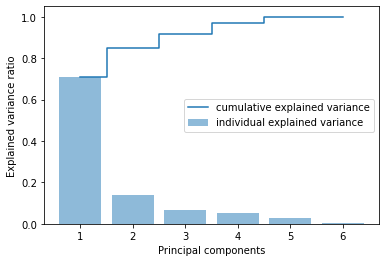

In [47]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

Taking First three dimension as it covers almost 90% features 

In [48]:
df['Rating'] = (4.30252561)*df['Runs'] + df['Ave']*(0.83636692) + df['SR']*(0.01706297)

In [49]:
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rating
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,3207.579265
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,2571.776348
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,2160.101348
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,2099.879168
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,2484.338555
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,2445.075772
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,1365.802751
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,1891.014226
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,1408.600634
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,1120.029197


In [50]:
df.sort_values(by=['Rating'], ascending=False)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rating
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,3207.579265
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,2571.776348
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,2484.338555
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,2445.075772
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,2160.101348
...,...,...,...,...,...,...,...,...
163,R Ashwin,18.0,6.00,120.00,2.0,0.0,0.0,84.511219
169,A Mishra,16.0,5.33,80.00,1.0,0.0,0.0,74.663283
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,57.852813
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,29.177403


--- End---